In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import colorlover as cl

import dask.array as da
import dask.dataframe as dd

from scipy.misc.pilutil import imread

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
output_notebook()



colors_=['#E04B39', '#328BBC', '#9B8FD7', ]
colors=["#3288bd", "#99d594", "#e6f598", "#fee08b", "#fc8d59", "#d13e4d"]

Loading BokehJS ...

In [2]:
ruta="/home/comdisde/Documentos/Data/pubg-match-deaths/deaths/"

In [3]:
%%time
df_pandas=pd.read_csv("/home/comdisde/Documentos/Data/pubg-match-deaths/deaths/kill_match_stats_final_0.csv")

CPU times: user 27.8 s, sys: 1.75 s, total: 29.5 s
Wall time: 52.3 s


In [4]:
%%time
df=dd.read_csv(ruta+"kill_match_stats_final_0.csv")

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 97.2 ms


In [5]:
df.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


In [6]:
len(df)

13426348

In [7]:
df.shape

(Delayed('int-08fae060-2769-4ef1-9c65-c4f9eeb9d9c3'), 12)

In [6]:
df["unos"]=1

In [7]:
len(df.match_id.drop_duplicates())

148308

In [8]:
%%time
conteo=df[["killed_by", "unos"]].groupby("killed_by").count().compute()

CPU times: user 27.9 s, sys: 2.69 s, total: 30.6 s
Wall time: 36.2 s


In [9]:
conteo.sort_values("unos" , ascending=False, inplace=True)

In [10]:
armas=['M416','SCAR-L', 'M16A4', 'AKM', 'UMP9','S1897', 
 'Mini 14','Kar98k', 'S686', 'SKS', 'S12K', 'Micro UZI', 
 'Tommy Gun', 'P1911', 'P92','M24', 'R1895', 'DP-28', 
 'VSS', 'AWM', 'M249', 'Win94','Mk14', 'P18C', 'AUG','R45','Groza', 'Vector','Crossbow']

vehiculos=['Aquarail','Boat','Buggy', 'Dacia','Hit by Car', 'Motorbike', 
           'Motorbike (SideCar)','Pickup Truck', 'Uaz', 'Van', 'death.PG117_A_01_C']

cuerpo=[ 'Machete', 'Pan','Punch', 'Sickle', 'Crowbar',]


arrojadizos=['Grenade','death.ProjMolotov_C','death.ProjMolotov_DamageField_C',]


circunstancias=set(conteo.index)-(set(armas) |set(cuerpo) |set(vehiculos)|set(arrojadizos))

In [11]:
aux=conteo.loc[armas[:6]]

source=ColumnDataSource(dict(muerte=list(aux.index), cantidad=aux.unos
                             , color=Spectral6),)

p = figure(x_range=list(aux.index), plot_height=300, plot_width=800, title=u"Armas con más muertes")

p.vbar(x='muerte', top='cantidad', width=0.9, color='color', legend="muerte", source=source)

p.title.text_font_size = '20pt'
p.title.align="center"

p.legend.location = "top_center"
p.legend.orientation="horizontal"

p.legend.border_line_color="Black"
p.legend.glyph_height=20
p.legend.label_height=1
p.legend.label_width=1

p.legend.border_line_dash="dashed"
p.legend.background_fill_alpha=.3



show(p)

In [12]:
finales=df[(df.killer_placement==1) & (df.victim_placement==2)].compute()

In [13]:
finales.describe(percentiles=[.05,.1,.95])

,killer_placement,killer_position_x,killer_position_y,time,victim_placement,victim_position_x,victim_position_y,unos
count,228250.0,228250.000000,228250.000000,228250.000000,228250.0,228250.000000,228250.000000,228250.0
mean,1.0,405357.645262,394370.176622,1833.384188,2.0,405765.904179,394928.199423,1.0
std,0.0,150188.650752,148961.700338,150.221423,0.0,149702.108804,148535.766778,0.0
min,1.0,0.000000,0.000000,78.000000,2.0,0.000000,0.000000,1.0
5%,1.0,158700.640000,155377.325000,1650.000000,2.0,160047.610000,156392.940000,1.0
10%,1.0,200935.830000,192810.510000,1724.000000,2.0,201783.330000,193373.080000,1.0
50%,1.0,408279.900000,392479.200000,1856.000000,2.0,408335.700000,393079.900000,1.0
95%,1.0,646640.265000,649559.165000,1978.000000,2.0,647316.030000,649785.650000,1.0
max,1.0,789584.300000,751237.400000,2374.000000,2.0,789826.400000,752417.000000,1.0


In [14]:
finales.reset_index(drop=True, inplace=True)

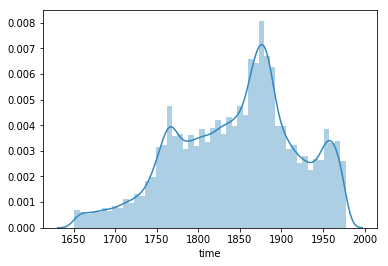

In [15]:
sns.distplot(finales.time.map(lambda x: x if 1978>x>1650 else np.nan).dropna(), color=colors[0])

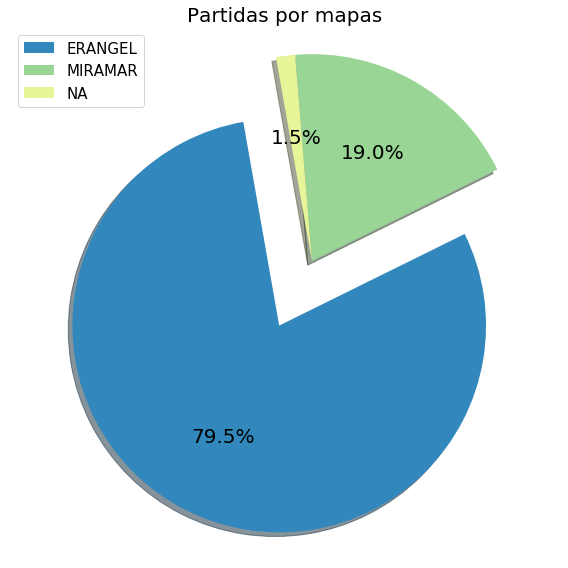

In [16]:
fig, axes = plt.subplots(figsize=(8, 8))

patches, texts, autotexts=plt.pie(finales.map.replace(np.nan,"NA").value_counts(), 
                                  #colors=['gold','yellowgreen', 'lightcoral','lightskyblue'][::-1], 
                                  colors=colors,
                                  shadow=True, startangle=100,  autopct='%1.1f%%', 
                                  explode = (.35, 0, 0), textprops={"fontsize":20}, )

plt.legend(labels=finales.map.replace(np.nan,"NA").value_counts().index,loc="best",prop={'size': 15})

for t in texts:
    t.set_size('small')

axes.set_title(u"Partidas por mapas", fontdict={'fontsize':20,})
fig.tight_layout()
plt.axis('equal')

plt.show()


In [17]:
MIRAMAR = imread("/home/comdisde/Documentos/Data/pubg-match-deaths/miramar.jpg")

In [18]:
mapa="MIRAMAR"
if mapa=="MIRAMAR": k=1000/800000
elif mapa=="ERANGEL": k=4096/800000

def plot_map(n):
    DATA=finales[finales["map"]==mapa]

    DATA=DATA.iloc[n:(n+1)]
    DATA.dropna(subset=[x for x in finales.columns if "position" in x], inplace=True)
    DATA[[x for x in finales.columns if "position" in x]]=DATA[[x for x in finales.columns 
                                                    if "position" in x]]*k
    DATA.reset_index(drop=True, inplace=True)

    fig, ax = plt.subplots(figsize=(12,12))

    ax.set_xlim(0, 1000); ax.set_ylim(0, 1000)
    ax.imshow(eval(mapa))
    plt.scatter(DATA.killer_position_x,DATA.killer_position_y, s=900, 
                label="Ganador",alpha=.75,color=colors[0])
    plt.scatter(DATA.victim_position_x,DATA.victim_position_y, s=800, 
                label="Segundo Lugar", alpha=.75, color=colors[1])
    plt.legend(loc='upper left',  prop={'size': 20}, markerscale=.5)
    plt.gca().invert_yaxis()
    texto="""    Asesino: {Asesino} 
    Victima: {Victima} 
    Arma:{Arma} 
    Tiempo:{Tiempo}""".format(Asesino=DATA["killer_name"][0], Victima=DATA["victim_name"][0], 
                      Arma=DATA["killed_by"][0], Tiempo=DATA["time"][0])


    plt.title("Final de la partida %d en %s" %(n,mapa),{'fontsize':25, "weight":"light","family":"serif"})
    ax.set_axis_off()
    plt.text(690, 875, texto , 
         fontdict={"size":15, "color":"black", "family":"serif"}, 
         bbox=dict(boxstyle="round", ec="black",
                   fc="white", alpha=.8,lw=3 ))

In [19]:
block=widgets.BoundedIntText(value=0, min=0,max=43353, step=1,description='Partida:', disabled=False)

widgets.interact(plot_map, n=block)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEJvdW5kZWRJbnRUZXh0KHZhbHVlPTAsIGRlc2NyaXB0aW9uPXUnUGFydGlkYTonLCBtYXg9NDMzNTMpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSfigKY=


<function __main__.plot_map>

In [20]:
def sus_death(x):
    if x in armas: return "arma"
    elif x in vehiculos: return "vehiculo"
    elif x in arrojadizos: return "arrojadizo"
    elif x in circunstancias: return "circunstancia"
    elif x in cuerpo: return "cuerpo a cuerpo"

In [21]:
finales["killed_by_gp"]=finales.killed_by.map(sus_death)

In [22]:
ax1_data=finales[finales.killed_by_gp=="arma"].killed_by.value_counts()
ax1_data.index=list(ax1_data.index[:7])+["others" for x in range(22)]
ax1_data=ax1_data.reset_index().groupby("index").sum()

In [23]:
ax2_data=finales[finales.killed_by_gp=="circunstancia"].killed_by.value_counts()[:3]


Text(0.5,1,u'Victorias por circunstancias')

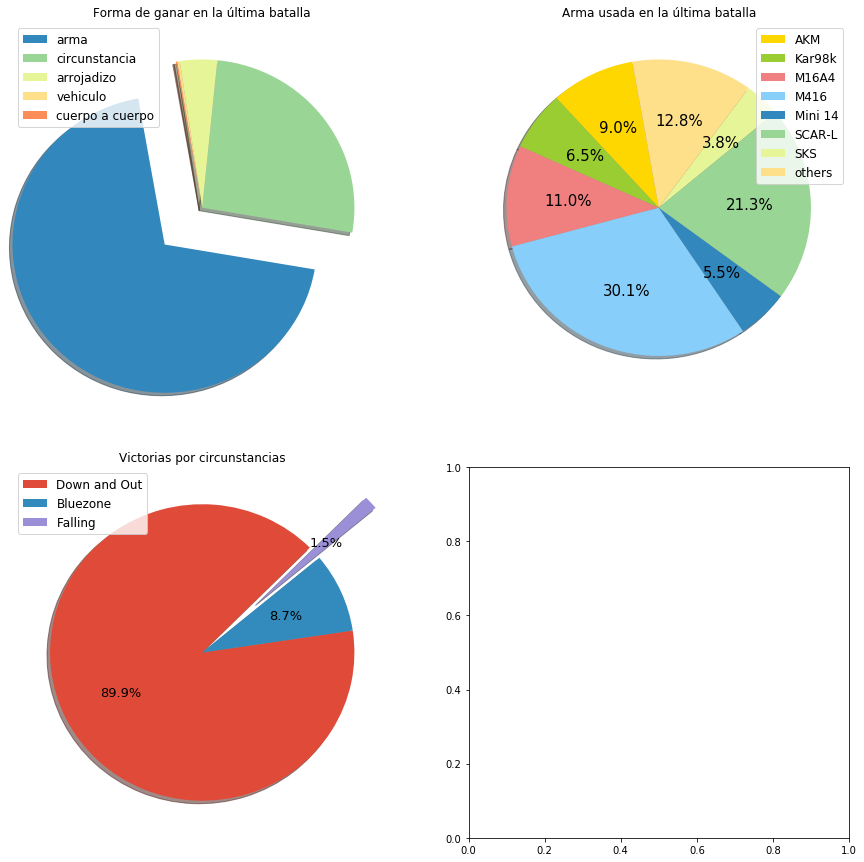

In [24]:
fig, axes = plt.subplots(figsize=(15, 15), ncols=2, nrows=2)
ax0, ax1, ax2, ax3 = axes.flatten()

patches=ax0.pie(finales.killed_by_gp.value_counts(), 
              #colors=['gold','yellowgreen', 'lightcoral','lightskyblue'][::-1], 
              colors=colors,shadow=True, startangle=100,  explode = (.35, 0, 0,0,0), 
              textprops={"fontsize":15}, )

ax0.legend(labels=finales.killed_by_gp.value_counts().index, loc="best",prop={'size': 12} )
ax0.set_title(u"Forma de ganar en la última batalla")

patches=ax1.pie(ax1_data["killed_by"], 
              colors=['gold','yellowgreen', 'lightcoral','lightskyblue']+colors, 
              shadow=True, startangle=100,  autopct='%1.1f%%', 
              textprops={"fontsize":15}, )

ax1.legend(labels=ax1_data.index, loc="best",prop={'size': 12} )
ax1.set_title(u"Arma usada en la última batalla")


patches=ax2.pie(ax2_data, 
              colors=colors_, 
              shadow=True, startangle=45,  autopct='%1.1f%%', 
              textprops={"fontsize":13}, explode=(0,0,.5))

ax2.legend(labels=ax2_data.index, loc="best",prop={'size': 12} )
ax2.set_title(u"Victorias por circunstancias")


In [25]:
finales=finales.dropna(subset=["map"]).reset_index(drop=True).copy()
X=finales[['killer_position_x','killer_position_y',
           'map','time','victim_position_x','victim_position_y']]
y=finales["killed_by_gp"]

0                  arma
7         circunstancia
20           arrojadizo
313            vehiculo
1110    cuerpo a cuerpo
Name: killed_by_gp, dtype: object